## Model Definition

In [17]:
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 18
drop_out = 0.2
first_dense_layer_nodes  = 512
second_dense_layer_nodes = 2

def get_model():
    
    model = Sequential()
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_out))
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    model.summary()
    
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [18]:
import pandas as pd
import numpy as np

concatenated_HO = pd.read_csv('concatenated_GSC-Features.csv')
subtracted_HO = pd.read_csv('subtracted_GSC-Features.csv')

X_concatenated_HO = concatenated_HO.iloc[:,2:20]
X_concatenated_HO = np.array(X_concatenated_HO.values)

Y_concatenated_HO = concatenated_HO.iloc[:,-1:]
Y_concatenated_HO = np.array(Y_concatenated_HO.values)
Y_concatenated_HO1 = to_categorical(Y_concatenated_HO)

X_subtracted_HO = subtracted_HO.iloc[:,2:11]
X_subtracted_HO = np.array(X_subtracted_HO.values)

Y_subtracted_HO = subtracted_HO.iloc[:,-1:]
Y_subtracted_HO = np.array(Y_subtracted_HO.values)
Y_subtracted_HO1 = to_categorical(Y_subtracted_HO)


# <font color='blue'>Creating Model</font>

In [19]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               4864      
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 514       
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
Total params: 5,378
Trainable params: 5,378
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [20]:
validation_data_split = 0.2
num_epochs = 1000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')



history = model.fit(X_concatenated_HO 
                    , Y_concatenated_HO1
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 80000 samples, validate on 20000 samples
Epoch 1/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6886 - acc: 0.5327 - val_loss: 0.6871 - val_acc: 0.5377
Epoch 2/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6832 - acc: 0.5427 - val_loss: 0.6813 - val_acc: 0.5481
Epoch 3/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6794 - acc: 0.5482 - val_loss: 0.6790 - val_acc: 0.5500
Epoch 4/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6761 - acc: 0.5513 - val_loss: 0.6765 - val_acc: 0.5517
Epoch 5/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6738 - acc: 0.5530 - val_loss: 0.6723 - val_acc: 0.5558
Epoch 6/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6722 - acc: 0.5539 - val_loss: 0.6715 - val_acc: 0.5541
Epoch 7/1000
80000/80000 [==============================] - 1s 10us/step - loss: 0.6701 - acc: 0.5560 - val_loss: 0.6697 

80000/80000 [==============================] - 1s 8us/step - loss: 0.6479 - acc: 0.5732 - val_loss: 0.6462 - val_acc: 0.5734
Epoch 60/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6480 - acc: 0.5731 - val_loss: 0.6462 - val_acc: 0.5730
Epoch 61/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6483 - acc: 0.5726 - val_loss: 0.6469 - val_acc: 0.5720
Epoch 62/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6481 - acc: 0.5724 - val_loss: 0.6457 - val_acc: 0.5758
Epoch 63/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6478 - acc: 0.5742 - val_loss: 0.6458 - val_acc: 0.5735
Epoch 64/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6478 - acc: 0.5734 - val_loss: 0.6461 - val_acc: 0.5724
Epoch 65/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6475 - acc: 0.5718 - val_loss: 0.6468 - val_acc: 0.5739
Epoch 66/1000
80000/80000 [==============

Epoch 118/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6454 - acc: 0.5753 - val_loss: 0.6444 - val_acc: 0.5760
Epoch 119/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6445 - acc: 0.5753 - val_loss: 0.6433 - val_acc: 0.5761
Epoch 120/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6444 - acc: 0.5765 - val_loss: 0.6436 - val_acc: 0.5753
Epoch 121/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6444 - acc: 0.5761 - val_loss: 0.6432 - val_acc: 0.5741
Epoch 122/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6445 - acc: 0.5747 - val_loss: 0.6427 - val_acc: 0.5749
Epoch 123/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6443 - acc: 0.5757 - val_loss: 0.6437 - val_acc: 0.5773
Epoch 124/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6455 - acc: 0.5749 - val_loss: 0.6432 - val_acc: 0.5763
Epoch 125/1000
80000

80000/80000 [==============================] - 1s 8us/step - loss: 0.6437 - acc: 0.5771 - val_loss: 0.6448 - val_acc: 0.5762
Epoch 177/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6434 - acc: 0.5780 - val_loss: 0.6446 - val_acc: 0.5762
Epoch 178/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6437 - acc: 0.5766 - val_loss: 0.6429 - val_acc: 0.5761
Epoch 179/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6439 - acc: 0.5770 - val_loss: 0.6430 - val_acc: 0.5766
Epoch 180/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6438 - acc: 0.5764 - val_loss: 0.6423 - val_acc: 0.5770
Epoch 181/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6431 - acc: 0.5766 - val_loss: 0.6440 - val_acc: 0.5763
Epoch 182/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6431 - acc: 0.5766 - val_loss: 0.6441 - val_acc: 0.5761
Epoch 183/1000
80000/80000 [=======

80000/80000 [==============================] - 1s 8us/step - loss: 0.6433 - acc: 0.5783 - val_loss: 0.6427 - val_acc: 0.5770
Epoch 235/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6435 - acc: 0.5773 - val_loss: 0.6419 - val_acc: 0.5771
Epoch 236/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6424 - acc: 0.5783 - val_loss: 0.6426 - val_acc: 0.5773
Epoch 237/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6425 - acc: 0.5770 - val_loss: 0.6427 - val_acc: 0.5766
Epoch 238/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6425 - acc: 0.5770 - val_loss: 0.6428 - val_acc: 0.5768
Epoch 239/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6430 - acc: 0.5769 - val_loss: 0.6431 - val_acc: 0.5773
Epoch 240/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6427 - acc: 0.5766 - val_loss: 0.6442 - val_acc: 0.5766
Epoch 241/1000
80000/80000 [=======

80000/80000 [==============================] - 1s 8us/step - loss: 0.6428 - acc: 0.5775 - val_loss: 0.6446 - val_acc: 0.5739
Epoch 293/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6427 - acc: 0.5773 - val_loss: 0.6432 - val_acc: 0.5771
Epoch 294/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6431 - acc: 0.5782 - val_loss: 0.6424 - val_acc: 0.5766
Epoch 295/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6429 - acc: 0.5773 - val_loss: 0.6422 - val_acc: 0.5756
Epoch 296/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6428 - acc: 0.5768 - val_loss: 0.6424 - val_acc: 0.5759
Epoch 297/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6433 - acc: 0.5780 - val_loss: 0.6423 - val_acc: 0.5774
Epoch 298/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6430 - acc: 0.5771 - val_loss: 0.6439 - val_acc: 0.5757
Epoch 299/1000
80000/80000 [=======

80000/80000 [==============================] - 1s 8us/step - loss: 0.6426 - acc: 0.5766 - val_loss: 0.6430 - val_acc: 0.5762
Epoch 351/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6423 - acc: 0.5775 - val_loss: 0.6453 - val_acc: 0.5763
Epoch 352/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6432 - acc: 0.5772 - val_loss: 0.6436 - val_acc: 0.5762
Epoch 353/1000
80000/80000 [==============================] - 1s 9us/step - loss: 0.6427 - acc: 0.5772 - val_loss: 0.6443 - val_acc: 0.5735
Epoch 354/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6428 - acc: 0.5764 - val_loss: 0.6434 - val_acc: 0.5743
Epoch 355/1000
80000/80000 [==============================] - 1s 8us/step - loss: 0.6426 - acc: 0.5773 - val_loss: 0.6430 - val_acc: 0.5775
Epoch 00355: early stopping


# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0xb3350fe80>,
      dtype=object)

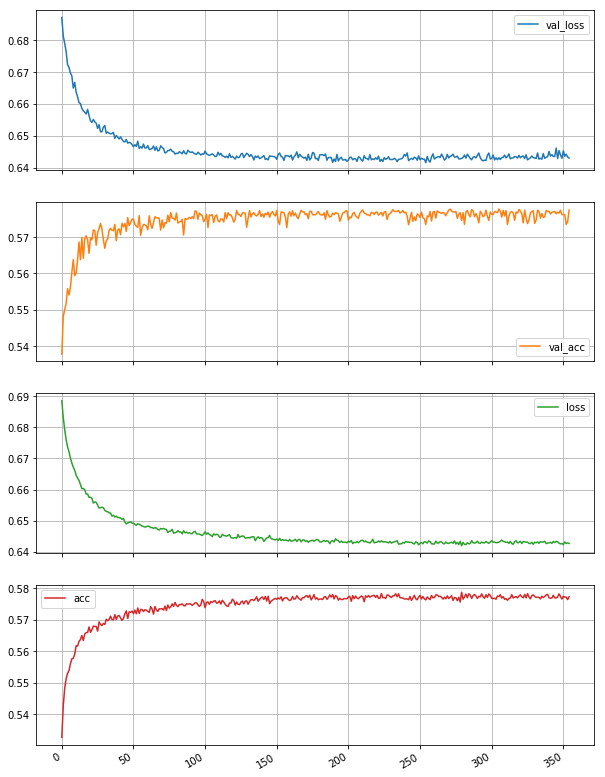

In [21]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))